대구 기온 데이터에서 시작 연도, 마지막 연도를 입력하고 특정 월의 최고 기온 및 최저
기온의 평균값을 구하고 그래프로 표현

In [42]:
import matplotlib.pyplot as plt
import pandas as pd
import koreanize_matplotlib

In [43]:
def draw_2plots(title,x_data,trend1,trend2,label1,label2):
    plt.rcParams['axes.unicode_minus']=False
    plt.figure(figsize=(10,4))
    plt.plot(x_data,trend1,marker='s',markersize=6,color='r',label=label1)
    plt.plot(x_data,trend2,marker='s',markersize=6,color='b',label=label2)
    plt.xticks(x_data)

    plt.title(title)
    plt.legend()
    plt.show()

2001년부터 2023년까지 8월의 기온 변화
8월 최고 기온 평균: 
 [31.4, 28.5, 29.2, 30.7, 31.0, 33.3, 32.0, 30.7, 29.7, 33.6, 30.3, 32.4, 34.4, 28.8, 31.2, 33.2, 31.4, 32.9, 32.2, 33.3, 30.5, 31.4, 31.9]
8월 최고 기온 평균: 
 [23.7, 22.1, 21.7, 22.4, 22.9, 24.3, 24.2, 22.2, 22.2, 25.0, 23.1, 24.5, 25.0, 21.7, 22.0, 23.2, 22.5, 23.7, 23.7, 24.8, 22.4, 23.4, 24.0]


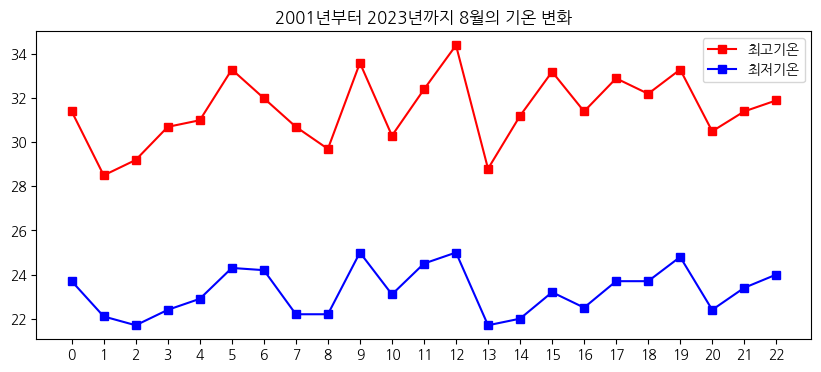

In [44]:
def main():
    year1=int(input('시작 연도를 입력하세요:'))
    year2=int(input('마지막 연도를 입력하세요:'))
    month=int(input('기온 변화를 측정할 달을 입력하세요:'))

    wdf=pd.read_csv('daegu-utf8-df.csv',encoding='utf-8-sig')
    wdf['날짜']=pd.to_datetime(wdf['날짜'],format='%Y-%m-%d')

    max_temp=[0]*(year2-year1+1)
    min_temp=[0]*(year2-year1+1)
    
    for i in range(year2-year1+1):
        year1_df=wdf[(wdf['날짜'].dt.year==year1+i)&
                     (wdf['날짜'].dt.month==month)]
        max_temp[i] = round(year1_df['최고기온'].astype(float).mean(), 1)  
        min_temp[i] = round(year1_df['최저기온'].astype(float).mean(), 1)
    print(f'{year1}년부터 {year2}년까지 {month}월의 기온 변화')
    print(f'{month}월 최고 기온 평균: \n {max_temp}')
    print(f'{month}월 최고 기온 평균: \n {min_temp}')

    return year1, year2, month, max_temp, min_temp



year1, year2, month, max_temp, min_temp = main()
x_data=[i for i in range(year2-year1+1)]
draw_2plots(f'{year1}년부터 {year2}년까지 {month}월의 기온 변화',x_data,max_temp,min_temp,'최고기온','최저기온')